# Imports,  Settings and Paths

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import time

In [2]:
from DeepPotentialModel import SubNetwork, DeepPotential, train

In [3]:
data_path = '../Dataset/network_inputs.npy'
label_path = '../Dataset/network_labels.npy'
model_path = '../Dataset/model_c7o2h10'

# Read the Data

In [4]:
X_train_npy = np.load(data_path)
Y_train_npy = np.load(label_path) * -1
X_train_npy.shape

(404000, 19, 72)

### Check for NaN values

In [5]:
use_ids = np.where(np.isnan(X_train_npy).sum(axis=2).sum(axis=1)==0)
print('{} Datapoints with NaN values found.'.format(X_train_npy.shape[0] - len(use_ids)))

403999 Datapoints with NaN values found.


In [6]:
X_train_npy = X_train_npy[use_ids]
Y_train_npy = Y_train_npy[use_ids]
X_train_npy.shape

(404000, 19, 72)

### Shuffle the Dataset

In [7]:
shuffle = np.arange(X_train_npy.shape[0])
np.random.shuffle(shuffle)
X_train_npy = X_train_npy[shuffle]
Y_train_npy = Y_train_npy[shuffle]

### Create Pytorch Variables

In [8]:
X_data = Variable(torch.Tensor(X_train_npy))
Y_data = Variable(torch.Tensor(Y_train_npy), requires_grad=False) - 11500

# Train Model

## Do the learning

In [ ]:
init_deep_pot = DeepPotential()
init_optim = torch.optim.Adam(init_deep_pot.parameters(), lr=1e-2)
deep_pot, optim = train(init_deep_pot, init_optim, X_data, Y_data, 100, 0, (0.01, 0.96, 1.5), print_every=1)

## Test the model
### Mean Absolute Error
The desired accuracy is about 0.04 eV

In [27]:
mae = np.abs(deep_pot.forward(X_data[-500:]).data.numpy().reshape(500) - Y_data[-500:].data.numpy().reshape(500)).mean()
print('The nural network reaches a mean absolute error of {} eV'.format(mae))

The nural network reaches a mean absolute error of 0.6296752095222473 eV


### Small test sample

In [37]:
deep_pot.forward(X_data[-10:])

Variable containing:
 3.9502
 1.8198
 3.5014
 2.9695
 4.4703
 4.2956
 3.1812
 3.9311
 3.3639
 4.4968
[torch.FloatTensor of size 10x1]

In [35]:
Y_data[-10:]

Variable containing:
 4.2441
 2.0049
 3.6494
 3.1289
 5.0332
 4.0723
 3.6084
 3.6260
 3.7363
 4.1455
[torch.FloatTensor of size 10]

## Save the Model Parameters

In [30]:
torch.save(deep_pot.state_dict(), model_path)

## Continue learning

In [32]:
deep_pot = DeepPotential()
deep_pot.load_state_dict(torch.load(model_path))
optim = torch.optim.Adam(deep_pot.parameters(), lr=1e-2)

1.0%: 0.390155 --- time estimate: 18.5 min
2.0%: 0.38101 --- time estimate: 17.5 min
3.0%: 0.329078 --- time estimate: 17.1 min
4.0%: 0.332424 --- time estimate: 16.8 min
5.0%: 0.300478 --- time estimate: 16.5 min
6.0%: 0.292925 --- time estimate: 16.3 min
7.0%: 0.275463 --- time estimate: 16.1 min
8.0%: 0.359195 --- time estimate: 15.9 min
9.0%: 0.260465 --- time estimate: 15.7 min
10.0%: 0.256881 --- time estimate: 15.5 min
11.0%: 0.249245 --- time estimate: 15.3 min
12.0%: 0.261372 --- time estimate: 15.1 min
13.0%: 0.239019 --- time estimate: 15.2 min
14.0%: 0.260359 --- time estimate: 15.0 min
15.0%: 0.241714 --- time estimate: 14.9 min
16.0%: 0.258149 --- time estimate: 14.7 min
17.0%: 0.222244 --- time estimate: 14.5 min
18.0%: 0.222244 --- time estimate: 14.3 min
19.0%: 0.199517 --- time estimate: 14.1 min
20.0%: 0.238565 --- time estimate: 14.0 min
21.0%: 0.23263 --- time estimate: 13.8 min
22.0%: 0.245734 --- time estimate: 13.6 min
23.0%: 0.229795 --- time estimate: 13.4 min

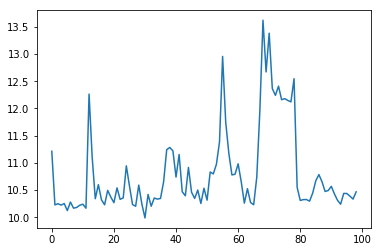

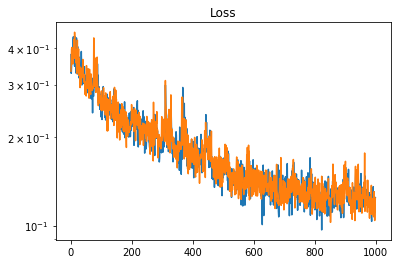

In [36]:
deep_pot, optim = train(deep_pot, optim, X_data, Y_data, 1000, 512, (0.001, 0.96, 1.5), use_for_train=0.9, print_every=10)